## QuantEcon Honours Workship
# Intorduction to Dynamic Programming
## Example 1: Annuity pricing

**Fedor Iskhakov**
*Research School of Economics, Australian National University*

The value of perpetual annuity is given by $$V=c+\beta c+\beta^{2}c+\dots=\sum_{t=0}^{\infty}\beta^{t}c,$$ where $\beta = \frac{1}{1+r} <1$.
We can solve this equation by iterating on its recursive version $$V=c+\beta V.$$
Unique solution is given by the fixed point of mapping $T(V)=c+\beta V$, and can be found by the iterative procedure because $T(V)$ is a contraction mapping.

In [214]:
%matplotlib inline

In [215]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
# Setup
c=1            # Annual payment
beta=.9        # Discount factor
maxiter=1000   # Maximum number of iterations
epsilon=1e-4   # Small number

def T(V):
    return c+beta*V

analytic=c/(1-beta)
print('Analytic solution = ', analytic)

V0=0
for i in range(maxiter):
    V1=T(V0)
    if abs(V1-V0)<epsilon:
        break
    V0=V1

print('Numerical solution = ', V1)

if i+1>=maxiter:
    print('No convergence: maximum number of iterations achieved!')
    

Analytic solution =  10.000000000000002
Numerical solution =  9.999153585021714


## Convergence behavior

Exercise: change the value of beta, V0

In [217]:
beta=.75
V0=0
diff0=0
print('{:<4} {:>15} {:>15} {:>15} {:>10}'.format('Iter','Value','Error','Delta','D-ratio'))
for i in range(maxiter):
    V1=T(V0)
    diff1=V1-V0
    if diff0==0:
        print('{:<4d} {:>15.10f} {:>15.10f} {:>15.10f}'.format(i,V1,V1-(c/(1-beta)),diff1))
    else:
        print('{:<4d} {:>15.10f} {:>15.10f} {:>15.10f} {:>10.5f}'.format(i,V1,V1-(c/(1-beta)),diff1,diff1/diff0))
    if abs(V1-V0)<epsilon:
        break
    V0=V1
    diff0=diff1
if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')


Iter           Value           Error           Delta    D-ratio
0       1.0000000000   -3.0000000000    1.0000000000
1       1.7500000000   -2.2500000000    0.7500000000    0.75000
2       2.3125000000   -1.6875000000    0.5625000000    0.75000
3       2.7343750000   -1.2656250000    0.4218750000    0.75000
4       3.0507812500   -0.9492187500    0.3164062500    0.75000
5       3.2880859375   -0.7119140625    0.2373046875    0.75000
6       3.4660644531   -0.5339355469    0.1779785156    0.75000
7       3.5995483398   -0.4004516602    0.1334838867    0.75000
8       3.6996612549   -0.3003387451    0.1001129150    0.75000
9       3.7747459412   -0.2252540588    0.0750846863    0.75000
10      3.8310594559   -0.1689405441    0.0563135147    0.75000
11      3.8732945919   -0.1267054081    0.0422351360    0.75000
12      3.9049709439   -0.0950290561    0.0316763520    0.75000
13      3.9287282079   -0.0712717921    0.0237572640    0.75000
14      3.9465461560   -0.0534538440    0.017817948

## Plots

In [218]:
# matplotlib settings
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['patch.force_edgecolor'] = True

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

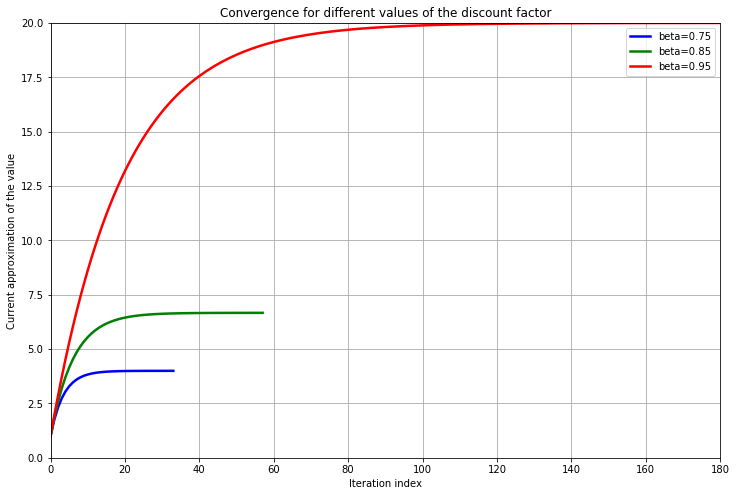

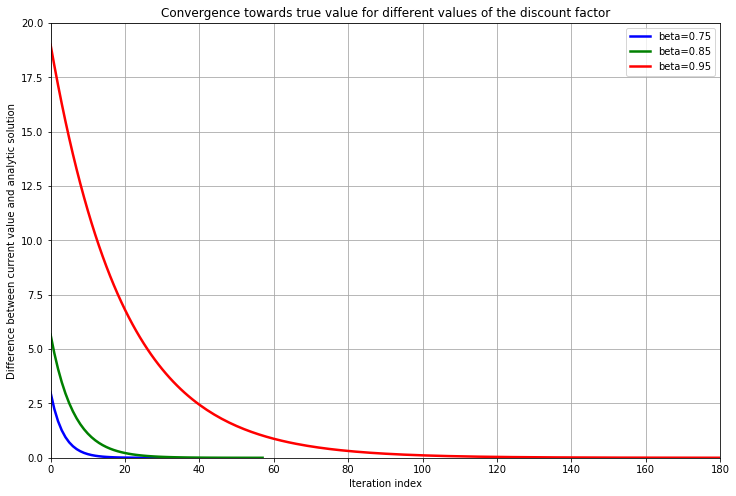

In [219]:
maxiter=500
fig1, ax1 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax1.set_title('Convergence for different values of the discount factor')
ax1.set_xlabel('Iteration index')
ax1.set_ylabel('Current approximation of the value')
fig2, ax2 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax2.set_title('Convergence towards true value for different values of the discount factor')
ax2.set_xlabel('Iteration index')
ax2.set_ylabel('Difference between current value and analytic solution')

for beta in (0.75,0.85,0.95):
    V0=0
    #solve for every beta
    analytic=c/(1-beta)
    data1=[]
    data2=[]
    for i in range(maxiter):
        V1=T(V0)
        data1.append(V1)
        data2.append(analytic-V1)
        if abs(V1-V0)<epsilon:
            break
        V0=V1
    ax1.plot(range(i+1),data1,label='beta={:.2f}'.format(beta),linewidth=2.5)
    ax2.plot(range(i+1),data2,label='beta={:.2f}'.format(beta),linewidth=2.5)
plt.figure(1)
plt.legend(loc=1)
# plt.savefig('annuity1.eps', format='eps', dpi=300)
plt.figure(2)
plt.legend(loc=1)
# plt.savefig('annuity2.eps', format='eps', dpi=300)
plt.show()
